# Speech To Text (5b)

Vivek Nayak (vgn2004), 
Arjun Sharma (as13521)

#Background

*Note: The references link to documents relevant to the sentence being read, information from these references were not copied from or paraphrased.*
\
\
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;The project topic is speech recognition, aka converting speech to text [\[11\]](#scrollTo=oIZM2e1Swt9Q). The technical problem statement can be described as: given many audio clips in waveform format (i.e. audio without any compression), can you generate sentences in the English language (characters include lower case alphabets, spaces and apostrophes) that have the least distance from the transcriptions of the audio clips. The paper at hand [\[13\]](#scrollTo=oIZM2e1Swt9Q) takes the approach of training a deep learning system directly on the audio, without hand-crafting any features [\[12\]](#scrollTo=oIZM2e1Swt9Q). Specifically, the audio is transformed into a representation which contains intensity values per frequency and time bins, known as a ‘spectrogram’ [\[9\]](#scrollTo=oIZM2e1Swt9Q) and processed by the neural network, which then spits out probability distributions over a character distribution.
\
\
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;This paper is of significance because laborious work such as extracting specialized features and applying acoustic models on the data is rendered redundant, simplifying the process of training and deploying this speech recognition model. As the deep learning model is able to transcribe speech well even when the environment is noisy, it is much more amenable to being deployed in real-world situations than the previous models.
\
\
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;The paper leverages a neural network architecture where for some units in the hidden layer, the output on the previous example in a sequence is piped as an input to the input when running the forward pass for the next example in the sequence. This is called a recurrent neural network [\[3\]](#scrollTo=oIZM2e1Swt9Q) and is seen to be effective in sequence prediction problems. The sequence, in this case, is the audio file converted into a spectrogram. At each time step ‘t’, we have the intensity value for different frequency bins. The output from each time step ‘t’ is fed in a recurrent manner to the time step ‘t+1’. The final output of the neural network is a sequence of character probabilities per time step, over the space of small alphabets, a space (gap between words), blank (interval does not correspond to any sound) and an apostrophe (29 output nodes in total).
\
\
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;The network contains five layers of hidden units. The first three layers are not recurrent. The fourth layer is a bi-directional recurrent layer, containing two sets of recurrent units with forward and backward recurrences. Basically, information in the bi-directional neural network is supplied by both the next and the previous part of the sequence. The fifth non-recurrent hidden layer takes both forward and backward recurrent unit outputs as its input. For each time slice t, the output layer outputs character probabilities using a softmax function to calculate the probabilities from node outputs. The loss function used is called CTC, or Connectionist Temporal Classification [\[8\]](#scrollTo=oIZM2e1Swt9Q), which penalizes alignment mistakes due to addition, subtraction or translation of characters. To prevent overfitting, a fraction of the input units (chosen randomly) are set to zero during training. This forces the model to learn a more robust representation of the data, because it must learn to compensate for the missing input units. This technique is called dropout [\[5\]](#scrollTo=oIZM2e1Swt9Q) and reduces the complexity of the model. For this paper, a dropout rate of 5-10 percent is used.
\
\
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;For training, 5000 hours of speech read out by 9600 speakers was collected by Baidu [\[4\]](#scrollTo=oIZM2e1Swt9Q), the entity which funded this research. Since labeling speech from noisy environments was not practical, noisy environment recordings were generated by overlaying noise on top of speech. In order to ensure that these noisy clips would be similar to recorded noisy clips, any candidate noisy clips with average power per frequency band differing significantly from “natural” noise was rejected. To account for the Lombard effect [\[7\]](#scrollTo=oIZM2e1Swt9Q), aka the change in inflection observed when people speak in noisy environments to compensate for the noise, speech samples were recorded by people who were listening to loud background noise. During testing, the complete test set present within Switchboard Hub 5’00 [\[6\]](#scrollTo=oIZM2e1Swt9Q), a widely used speech to text benchmark, is used for checking the model’s performance. The performance metric we care about is called "Word Error Rate" [\[1\]](#scrollTo=oIZM2e1Swt9Q), which is measured as the fraction of words which would need to be substituted/deleted/inserted in the model's output in order for it to match the correct transcription.
\
\
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;In this research, the researchers used homogeneous rectified linear networks to make the implementation of the model simpler and more efficient. They employed multi-GPU training to accelerate the training process through techniques such as data parallelism, model parallelism, and striding. Data parallelism involves processing multiple examples in parallel by concatenating them into a single matrix. In order to handle utterances with different lengths, they sorted the training examples by length and combined only similar-sized utterances into minibatches, padding with silence so that all utterances in the minibatch had the same length. Model parallelism involves partitioning the model to scale training based on time dimension. This was achieved by bidirectional parallelization, which involves splitting the time series into two halves and using two GPUs to compute the forward and backward activations in parallel. 
\
\
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Despite an impressive Word Error Rate of 16% on the Switchboard hub's full test dataset, the approach described in the paper does have its limitations. The human transcriptionist word error rate is around 4% [\[2\]](#scrollTo=oIZM2e1Swt9Q), which is much lower than the 16% achieved by this model (Note that on clean audio samples, the performance of the model is much better: 6.5%). Therefore, it cannot yet compete with a human trancriptionist along the accuracy dimension.


#  Working with the existing code

*Note: the Quartz model is a recent improved model, with similar architectural choices as Deep Speech.*

**What does the code do**:
A youtube video's (popular clip from mission impossible TV series) audio is converted to waveform format. The Deep Speech [\[15\]](#scrollTo=oIZM2e1Swt9Q) and Quartz Net [\[16\]](#scrollTo=oIZM2e1Swt9Q) models are pythonically loaded. We then obtain the text output for both models, when fed with the waveform input. Finally, we display the text outputs along with the actual transcription and calculate Word Error Rate for both models.


**Explanation per cell**:
1. Relevant python3 packages are installed. Notable packages are 'deepspeech' (used by Deep Speech model), 'jiwer' (used to calculated Word Error Rate) and 'youtube-dl' (used to download wav audio from a youtube video)
2. Packages are imported into Python
3. CSS-based approach to ensure that text output wraps around, making it easier to read text
4. Linux terminal commands to download the Quartz model and its underlying dependencies.
5. A quick look at the youtube video chosen
6. Extraction of audio from the youtube video and conversion using linux 'ffmpeg' too into a waveform file with the right audo codec and sampling frequency.
7. The waveform file created in the last cell is loaded Pythonically and the Deep Speech model is run on the audio input.
8. Python client setup for the Quartz net is created here. The process involves creating a manifest describing the audio file (length, file path, etc) and running inference on the audio.
9. Side-by-side comparision of model outputs with an accurate transcription.
10. Word Error rates for both model outputs are calculated and printed.


The following changes were made to smoothen things out:

---


- A set_css() function which wraps text in output to make it easier to read long transcriptions
- All pip commands were combined into one line in cell 2
- A different youtube video was chosen than the one in the given notebooks, to make it easier to compare transcriptions (as this video is shorter and more fun)
- Warnings were filtered out and ignored to make the outputs appear cleaner
- The 'jiwer' module was imported to check Word Error rates for the outputs
- Instead of using a bash command for running the deep speech command, a more Pythonic approach was used to make the code all-Python.
- While using the Quartz network notebook, the specific format of the youtube video url was causing issues (403 HTTP errors); therefore, the URL is changed to reflect a more modern URL style.
- Collected imports into one cell and added comments per cell

---


In [ ]:
!pip3 -q install jiwer deepspeech wget youtube-dl wget jiwer tensorboardX kaldi-io marshmallow num2words ruamel.yaml soundfile sox torch-stft unidecode nemo-toolkit==0.9.0 nemo-asr==0.9.0 

     |████████████████████████████████| 9.2 MB 5.4 MB/s 
     |████████████████████████████████| 1.9 MB 51.1 MB/s 
     |████████████████████████████████| 125 kB 3.3 MB/s 
     |████████████████████████████████| 125 kB 51.8 MB/s 
     |████████████████████████████████| 109 kB 54.2 MB/s 
     |████████████████████████████████| 235 kB 57.8 MB/s 
     |████████████████████████████████| 77 kB 3.7 MB/s 
     |████████████████████████████████| 45 kB 3.3 MB/s 
     |████████████████████████████████| 13.5 MB 65.6 MB/s 
     |████████████████████████████████| 1.4 MB 55.1 MB/s 
     |████████████████████████████████| 2.2 MB 37.7 MB/s 
     |████████████████████████████████| 555 kB 73.9 MB/s 
     |████████████████████████████████| 13.1 MB 63.8 MB/s 


In [ ]:
import os
import tqdm
import json
from ruamel.yaml import YAML
import nemo
import nemo_asr
import deepspeech
import wave
import numpy as np
import pandas as pd
from jiwer import wer
import warnings
import logging
logging.disable(logging.CRITICAL)
warnings.filterwarnings('ignore')
from IPython.display import HTML, display
from IPython.display import YouTubeVideo

Unable to import APEX. Mixed precision and distributed training will not work.


################################################################################
### WARNING, path does not exist: KALDI_ROOT=/mnt/matylda5/iveselyk/Tools/kaldi-trunk
###          (please add 'export KALDI_ROOT=<your_path>' in your $HOME/.profile)
###          (or run as: KALDI_ROOT=<your_path> python <your_script>.py)
################################################################################



In [ ]:
# Wrap text of cell outputs
def set_css():
  display(HTML('''
  <style>
    pre {
      white-space: pre-wrap;
    }
  </style>
  ''')) 
get_ipython().events.register('pre_run_cell', set_css)

In [ ]:
!curl -LO https://github.com/mozilla/DeepSpeech/releases/download/v0.9.3/deepspeech-0.9.3-models.pbmm
!curl -LO https://github.com/mozilla/DeepSpeech/releases/download/v0.9.3/deepspeech-0.9.3-models.scorer
!git clone -q --depth 1 https://github.com/NVIDIA/apex
!cd apex && pip install -q --no-cache-dir ./
!wget -nc -q --show-progress -O quartznet15x5.zip https://api.ngc.nvidia.com/v2/models/nvidia/multidataset_quartznet15x5/versions/1/zip
!unzip quartznet15x5.zip && mkdir quartznet15x5_multidataset && mv Jasper* quartznet15x5.yaml quartznet15x5_multidataset

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  180M  100  180M    0     0  49.1M      0  0:00:03  0:00:03 --:--:-- 60.7M
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  909M  100  909M    0     0  75.5M      0  0:00:12  0:00:12 --:--:-- 74.1M
  DEPRECATION: A future pip version will change local packages to be built in-place without first copying to a temporary directory. We recommend you use --use-feature=in-tree-build to test your packages with this new behavior before it becomes the default.
   pip 21.3 will remove support for this functionality. You can find discussion regarding this at https://githu

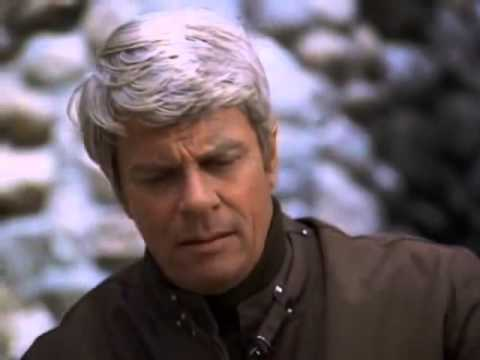

In [ ]:
# Display chosen youtube video 
YOUTUBE_ID = '0TiqXFssKMY'
url = f"https://www.youtube.com/watch?v={YOUTUBE_ID}"
actual_transcript = "your mission should you choose to accept it is to get the document and bring anna kirk oscar to safety as always should you or any member of your im force be caught or killed the secretary will disavow any knowledge of your actions this tape will self destruct in five seconds"
YouTubeVideo(YOUTUBE_ID)

In [ ]:
!youtube-dl --extract-audio --audio-format wav --quiet --output "downloaded.%(ext)s" $url
!ffmpeg  -y -i ./downloaded.wav -acodec pcm_s16le -ac 1 -ar 16000 test.wav

ffmpeg version 3.4.11-0ubuntu0.1 Copyright (c) 2000-2022 the FFmpeg developers
  built with gcc 7 (Ubuntu 7.5.0-3ubuntu1~18.04)
  configuration: --prefix=/usr --extra-version=0ubuntu0.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --enable-gpl --disable-stripping --enable-avresample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librubberband --enable-librsvg --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvorbis --enable-libvpx --enable-libwavpack --enable-libwebp --enable-libx265 --enable-libxml2 --enable-libxvid --enable-li

In [ ]:
# Load Deep Speech model and run on audio
fin = wave.open('test.wav', 'rb')
audio = np.frombuffer(fin.readframes(fin.getnframes()), np.int16)
fin.close()
ds = deepspeech.Model('deepspeech-0.9.3-models.pbmm')
ds.enableExternalScorer('deepspeech-0.9.3-models.scorer')

deepspeech_output = ds.stt(audio)

In [ ]:
# Load Quartz model and run on audio

WORK_DIR = "/content/quartznet15x5_multidataset"
MODEL_YAML = "/content/quartznet15x5_multidataset/quartznet15x5.yaml"
CHECKPOINT_ENCODER = "/content/quartznet15x5_multidataset/JasperEncoder-STEP-243800.pt"
CHECKPOINT_DECODER = "/content/quartznet15x5_multidataset/JasperDecoderForCTC-STEP-243800.pt"

# Read model YAML
yaml = YAML(typ="safe")
with open(MODEL_YAML) as f:
    jasper_model_definition = yaml.load(f)
labels = jasper_model_definition['labels']

# Instantiate necessary Neural Modules
neural_factory = nemo.core.NeuralModuleFactory(
    placement=nemo.core.DeviceType.CPU,
    backend=nemo.core.Backend.PyTorch)
data_preprocessor = nemo_asr.AudioToMelSpectrogramPreprocessor(factory=neural_factory)
jasper_encoder = nemo_asr.JasperEncoder(
    jasper=jasper_model_definition['JasperEncoder']['jasper'],
    activation=jasper_model_definition['JasperEncoder']['activation'],
    feat_in=jasper_model_definition['AudioToMelSpectrogramPreprocessor']['features'])
jasper_encoder.restore_from(CHECKPOINT_ENCODER, local_rank=0)
jasper_decoder = nemo_asr.JasperDecoderForCTC(
    feat_in=1024,
    num_classes=len(labels))
jasper_decoder.restore_from(CHECKPOINT_DECODER, local_rank=0)
greedy_decoder = nemo_asr.GreedyCTCDecoder()

def wav_to_text(manifest, greedy=True):
    yaml = YAML(typ="safe")
    with open(MODEL_YAML) as f:
        jasper_model_definition = yaml.load(f)
    labels = jasper_model_definition['labels']

    # Instantiate necessary neural modules
    data_layer = nemo_asr.AudioToTextDataLayer(
        shuffle=False,
        manifest_filepath=manifest,
        labels=labels, batch_size=1)

    # Define inference DAG
    audio_signal, audio_signal_len, _, _ = data_layer()
    processed_signal, processed_signal_len = data_preprocessor(
        input_signal=audio_signal,
        length=audio_signal_len)
    encoded, encoded_len = jasper_encoder(audio_signal=processed_signal,
                                          length=processed_signal_len)
    log_probs = jasper_decoder(encoder_output=encoded)
    predictions = greedy_decoder(log_probs=log_probs)

    if greedy:
        eval_tensors = [predictions]

    tensors = neural_factory.infer(tensors=eval_tensors)
    if greedy:
        from nemo_asr.helpers import post_process_predictions
        prediction = post_process_predictions(tensors[0], labels)
    else:
        prediction = tensors[0][0][0][0][1]
    return prediction

def create_manifest(file_path):
    # create manifest
    manifest = dict()
    manifest['audio_filepath'] = file_path
    manifest['duration'] = 18000
    manifest['text'] = 'todo'
    with open(file_path+".json", 'w') as fout:
        fout.write(json.dumps(manifest))
    return file_path+".json"

quartz_output = wav_to_text(create_manifest('test.wav'))[0]

STFT using torch


In [ ]:
print(f"\nACCURATE TRANSCRIPTION: {actual_transcript}")
print(f"\nDEEP SPEECH OUTPUT: {deepspeech_output}")
print(f"\nQUARTZ OUTPUT: {quartz_output}")


ACCURATE TRANSCRIPTION: your mission should you choose to accept it is to get the document and bring anna kirk oscar to safety as always should you or any member of your im force be caught or killed the secretary will disavow any knowledge of your actions this tape will self destruct in five seconds

DEEP SPEECH OUTPUT: your mission should you choose to accept it is to get the document then bringing unaccosted to safety as always should you or any member of your i am for beautified the secretary will disavow nolledge of your actions this tablet destructive five seconds

QUARTZ OUTPUT: your mission should you choose to accept it is to get the document and bring anna car koska to safety as always should you or any member of your i am forsbe caught or killed the secretary will disallow any knowledge of your actions mis tables self destruct in five seconds


In [ ]:
# Calculate Word Error Rates
print(f"QUARTZ WER: {wer(actual_transcript, quartz_output)*100:.2f}%, DEEP SPEECH WER: {wer(actual_transcript, deepspeech_output)*100:.2f}%")

QUARTZ WER: 17.31%, DEEP SPEECH WER: 34.62%


# Validating a claim

*References : Libri Speech dataset - [\[14\]](#scrollTo=oIZM2e1Swt9Q) (added above as Markdown syntax does not work within HTML tags)*

<p align=justify>
We validate the claim that a deep-learning based approach obtains a 6.56% WER on clean (not noisy) audio samples.  This claim is foundational to justifying the use of deep learning for speech recognition, as it approaches the 4% WER accomplished by human transcriptionists.  By validating this claim, we learn that deep neural networks are a powerful tool that can be applied successfully on the problem of speech recognition.
<br /><br />
The other claims, such as validating that the model works well in a noisy environment would require access to datasets that are either hard to curate (noisy speech datasets), impossible (Baidu's internal dataset isn't public) or expensive (Switchboard Hub5'00 costs 1000+ dollars).
<br /><br />
In order to test the models, a subset of the clean test section of open source LibriSpeech dataset is used. We run 150 sound clips through the and calculate word error rate of following models: Deep Speech and Quartz Net. To ease the process, we uploaded part of the dataset to Github along with a csv file containing transcriptions (the csv was constructed on my local system using basic python scripting). We find that the WER rate for the two deep learning models ranges from 9 to 4 percent, which is within the ballpark of the stated value of 6 percent.
<br /><br />
As a bonus addition, we've included model outputs for a 3 minutes excerpt from a noisy-environment conversation between space Youtuber Scott Manley and the developers of the game 'Kerbal Space Program'. While this does not count as a  validation as it is one example and we do not have the original transcript to compare against, it does give us a subjective peek at model performance in a noisy environment.
<br /><br .>
No code apart from our own was used in this section.
</p>

In [ ]:
!rm -rf ./librispeech_subset
!git clone -q https://github.com/VivekBits2210/librispeech_subset.git
!unrar x ./librispeech_subset/processed_audio.rar


UNRAR 5.50 freeware      Copyright (c) 1993-2017 Alexander Roshal


Extracting from ./librispeech_subset/processed_audio.rar

Creating    processed_audio                                           OK
Extracting  processed_audio/1993-147149-0000.flac                          0%  OK 
Extracting  processed_audio/1993-147149-0001.flac                          0%  OK 
Extracting  processed_audio/1993-147149-0002.flac                          1%  OK 
Extracting  processed_audio/1993-147149-0003.flac                          2%  OK 
Extracting  processed_audio/1993-147149-0004.flac                          2%  OK 
Extracting  processed_audio/1993-147149-0005.flac                          3%  OK 
Extracting  processed_audio/1993-147149-0006.flac                          4%  OK 
Extracting  processed_audio/1993-147149-0007.flac                          5%  OK 
Extracting  processed_audio/1993-147149-0008.flac               

In [ ]:
transcript_df = pd.read_csv('./librispeech_subset/transcripts.csv')
transcript_df['quartz_output'] = ''
transcript_df['ds_output'] = ''
transcript_df.sample(20)

,file_name,transcript,quartz_output,ds_output
29,1993-147149-0029,it was a comfort to her when scolded by miss s...,,
123,777-126732-0010,and i could never get as many as three such me...,,
71,2086-149220-0008,it was evident that the race had degenerated l...,,
81,2086-149220-0018,i prefer to think and so would miss hepzibah t...,,
3,1993-147149-0003,the board not so formidable as she had imagine...,,
97,2086-149220-0034,if the original is still in the world i think ...,,
10,1993-147149-0010,wishing him said mary in a tone of inquiry,,
43,1993-147965-0001,morning prayers were longer than usual,,
62,2086-149214-0004,he trusts not to be considered as unpardonably...,,
112,2086-149220-0049,at some uncertain period in the depths of nigh...,,


*Note: The cell below will run for a while (6 seconds per testing example). To reduce the runtime, limit the size of the training set (training_set variable). If you wish to use the outputs of the model without computing them, uncomment the cell after this one.*

In [ ]:
training_set = None
path = './processed_audio/'
data = []
counter = 0
for file in tqdm.tqdm(os.listdir(path)):
  file_name, file_extension = os.path.splitext(file)
  if file_extension == '.flac':
    os.system(f"ffmpeg -y -i {path+file_name}.flac -acodec pcm_s16le -ac 1 -ar 16000  {path+file_name}.wav")
    fin = wave.open(f"{path+file_name}.wav", 'rb')
    audio = np.frombuffer(fin.readframes(fin.getnframes()), np.int16)
    fin.close()

    deepspeech_output =  ds.stt(audio)
    quartz_output = wav_to_text(create_manifest(f"{path+file_name}.wav"))[0]

    # print(f"\nACCURATE TRANSCRIPTION: {transcript_df[transcript_df['file_name']==file_name]['transcript'].iloc[0]}")
    # print(f"\nDEEP SPEECH OUTPUT: {deepspeech_output}")
    # print(f"\nQUARTZ OUTPUT: {quartz_output}")
   
    index = transcript_df[transcript_df['file_name']==file_name].index[0]
    transcript_df.loc[index,'ds_output'] = deepspeech_output
    transcript_df.loc[index,'quartz_output'] = quartz_output
    counter+=1
    if counter==training_set:
      break

100%|██████████| 195/195 [20:27<00:00,  6.29s/it]


In [ ]:
# Uncomment this cell to use model outputs that have already been stored
# transcript_df = pd.read_csv("./librispeech_subset/transcript_with_model_outputs.csv")

In [ ]:
#Calculate word error rate
relevant_transcript_df = transcript_df[transcript_df.quartz_output!='']
quartz_error_rate = wer(list(relevant_transcript_df['transcript']),list(relevant_transcript_df['quartz_output']))*100
ds_error_rate = wer(list(relevant_transcript_df['transcript']),list(relevant_transcript_df['ds_output']))*100

print(f"QUARTZ WER: {quartz_error_rate:.2f}%, DEEP SPEECH WER: {ds_error_rate:.2f}%")

QUARTZ WER: 4.86%, DEEP SPEECH WER: 9.31%


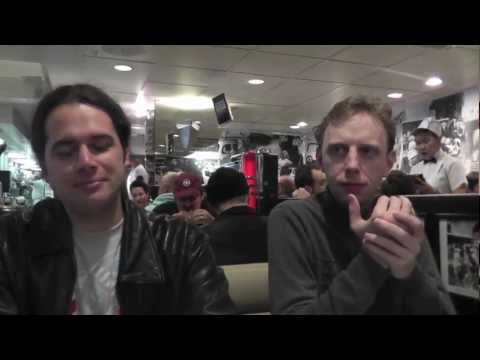

In [ ]:
# Display chosen youtube video 
YOUTUBE_ID = 'GKp_nAqlzaw'
url = f"https://www.youtube.com/watch?v={YOUTUBE_ID}"
YouTubeVideo(YOUTUBE_ID,start=9)

In [ ]:
!youtube-dl --extract-audio --audio-format wav --output "downloaded.%(ext)s" $url
!ffmpeg  -y -i ./downloaded.wav -acodec pcm_s16le -ac 1 -ar 16000 -ss 9 -to 180 test.wav

[youtube] GKp_nAqlzaw: Downloading webpage
[youtube] GKp_nAqlzaw: Downloading MPD manifest
[download] Destination: downloaded.m4a
[download] 100% of 19.96MiB in 07:14
[ffmpeg] Correcting container in "downloaded.m4a"
[ffmpeg] Destination: downloaded.wav
Deleting original file downloaded.m4a (pass -k to keep)
ffmpeg version 3.4.11-0ubuntu0.1 Copyright (c) 2000-2022 the FFmpeg developers
  built with gcc 7 (Ubuntu 7.5.0-3ubuntu1~18.04)
  configuration: --prefix=/usr --extra-version=0ubuntu0.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --enable-gpl --disable-stripping --enable-avresample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-

In [ ]:
# Load Deep Speech model and run on audio
fin = wave.open('test.wav', 'rb')
audio = np.frombuffer(fin.readframes(fin.getnframes()), np.int16)
fin.close()
ds = deepspeech.Model('deepspeech-0.9.3-models.pbmm')
ds.enableExternalScorer('deepspeech-0.9.3-models.scorer')

deepspeech_output = ds.stt(audio)
quartz_output = wav_to_text(create_manifest('test.wav'))[0]

In [ ]:
approximate_transcript = '''
i gotta do my oh it's scott manley here hello and 
we are near with philippe mike and chad and we are in san francisco for 
game developer conference two thousand and three and how are you guys liking it 
what does it say in your badge so i can clone it technical artist is what all access 
news like that out even have a squad back oh my gosh i want one fancy isn't it are you
presenting it the show or are you just attending we're obviously getting breakfast at this 
time that mel's drive it if somewhat notorious san francisco establishment why are the young 
tourists probably is a trashy tourists frat which means things happen here i wasn't sure i invite i just the last time actually every 
time i've been here i've been very drunk you're like hey where's a good place to go it's god's like let's go hi you asked for a place 
that was within walking distance of gdc and it came up there's many other options that are  possibly cheaper oh well but now they get to 
experience classic americana yes classic americana look at that this is this is how you thought the whole of america was like right mike 
this is how yes the jukebox at the table considering that we're outside the bad part of town he's been getting the color for local flavor yeah 
i like to fight that this is sitting open journey and don't stop believin which is a san francisco anthem of sorts is it it's like the only thing
 that people play in jukeboxes unlike my leg all the names like who's crying now my love and the beach boys as well with classic california how are you 
 finding a san francisco than other than that very nice far from where you're at classic newbie mistake right stay away from sixth street hotels are cheap 
 but there's a reason for that it rent or some many of those rooms by the hour yeah lessons learned all around yeah i mean i think for you guys kerbal space 
 program yeah kerbal space program has been a lesson you know learning experience right i've watched you struggle with the strut the kraken very specifically 
 right well it's something i did encounter it in the past and so it's kind of like i i remember making those mistakes yeah oh come across pretty much everyone 
 for all the lincoln costume yet

'''


print(f"\nDEEP SPEECH OUTPUT: {deepspeech_output}")
print(f"\nQUARTZ OUTPUT: {quartz_output}")
print(f"\nAPPROXIMATE TRANSCRIPT: {approximate_transcript}")


DEEP SPEECH OUTPUT: i got to do my pioneer with politicians shadower in san francisco for game developer conference two thousand three argues liking it roquat's it saying your badenwaeldschen timorousness meeneestyerstvoh tepanteohuatzin a roulette

QUARTZ OUTPUT: she gotta bo mi oh scotmamly herewen we are in san francisco for game developer conference two thousand an threemhantoris san francisco tablementintorio itme upthere's many other options that are possibly cheaperxrience amia yes classic americana this  this is how you itought the whole of america asyes the jukwos at the table considering that we're outside the bae's en gting fo ethe fight that this is sitting ofen at journey don't stop believin whic ofsa is sentrantiscal anthem of sorts beacheaswellcaliforniarheou tet classic mewby mistake right stay away from sixt street e tetails are chep but there's a reason for that ye  cirtal space program has been now alessen learning experience ight

APPROXIMATE TRANSCRIPT: 
i gotta d

##References

<a name="id"></a>
---
1. Helena Chen. Does Word Error Rate Matter (2021). [\[Link\]](https://smartaction.ai/blog/does-word-error-rate-matter)
2. Richard P. Lippman. Speech Recognition by Machines and Humans (1997). [\[PDF\]](https://www.ee.columbia.edu/~dpwe/papers/Lipp97-hummach.pdf)
3. IBM Cloud Education. What are Recurrent Neural Networks (2020). [\[Link\]](https://www.ibm.com/cloud/learn/recurrent-neural-networks)
4. [Wikipedia: Baidu](https://en.wikipedia.org/wiki/Baidu)
5. Jason Brownlee. A Gentle Introduction to Dropout for Regularizing Deep Neural Networks (2018). [\[Link\]](https://machinelearningmastery.com/dropout-for-regularizing-deep-neural-networks/)
6. [Hub5'00 English Evaluation Transcripts](https://paperswithcode.com/dataset/2000-hub5-english)
7. [Wikipedia: Lombard Effect](https://en.wikipedia.org/wiki/Lombard_effect)
8. [Wikipedia: CTC Loss](https://en.wikipedia.org/wiki/Connectionist_temporal_classification)
9. Leland Roberts. Understanding the Mel Spectrogram (2020). [\[PDF\]](https://medium.com/analytics-vidhya/understanding-the-mel-spectrogram-fca2afa2ce53)
10. [Wikipedia: Waveform Format](https://en.wikipedia.org/wiki/WAV)
11. Kesley Foster. What is ASR (2021). [\[Link\]](https://www.assemblyai.com/blog/what-is-asr/)
12. [Wikipedia: Deep Learning](https://en.wikipedia.org/wiki/Deep_learning)
13. Awni Hannun, Carl Case, Jared Casper, Bryan Catanzaro, Greg Diamos, Erich Elsen, Ryan Prenger, Sanjeev Satheesh, Shubho Sengupta, Adam Coates, Andrew Y. Ng.  Deep Speech: Scaling up end-to-end speech recognition. arXiv:1412.5567 (2014). [\[PDF\]](https://arxiv.org/pdf/1412.5567v2.pdf)
14. [LibriSpeech ASR Corpus](https://www.openslr.org/12)
15. [Mozilla Deep Speech Colab Notebook](https://colab.research.google.com/github/tugstugi/dl-colab-notebooks/blob/master/notebooks/MozillaDeepSpeech.ipynb)
16. [Nvidia Quartz Net Colab Notebook](https://colab.research.google.com/github/tugstugi/dl-colab-notebooks/blob/master/notebooks/NVidiaQuartzNet.ipynb)
---